In [ ]:
#

In [ ]:
!unzip Dataset5.zip

Archive:  Dataset5.zip
replace Dataset5/Test/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Dataset5/Test/Covid/01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg  
  inflating: Dataset5/Test/Covid/0a7faa2a.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S0140673620303706-fx1_lrg.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300608-main.pdf-001.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300608-main.pdf-002.jpg  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-002-a1.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-002-a2.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-003-b1.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S1684118220300682-main.pdf-003-b2.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S2214250920300834-gr1_lrg-b.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S2214250920300834-gr1_lrg-c.png  
  inflating: Dataset5/Test/Covid/1-s2.0-S238702

In [ ]:
TRAIN_PATH = "Dataset5/Train"
VAL_PATH ="Dataset5/Test"

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [ ]:
#CNN Based Model in Keras

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3 ),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 54, 54, 64)       

In [ ]:
# Train from Scratch 

train_datagen = image.ImageDataGenerator(
    rescale= 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,

)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'Dataset5/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 829 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'Dataset5/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
    )

Found 118 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=26,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps= 2)

Epoch 1/25
26/26 [==============================] - 28s 1s/step - loss: 1.0831 - accuracy: 0.7045 - val_loss: 0.4676 - val_accuracy: 0.7656
Epoch 2/25
26/26 [==============================] - 27s 1s/step - loss: 0.3243 - accuracy: 0.8456 - val_loss: 0.2326 - val_accuracy: 0.9531
Epoch 3/25
26/26 [==============================] - 27s 1s/step - loss: 0.2376 - accuracy: 0.9288 - val_loss: 0.1574 - val_accuracy: 0.9688
Epoch 4/25
26/26 [==============================] - 27s 1s/step - loss: 0.2430 - accuracy: 0.9131 - val_loss: 0.1887 - val_accuracy: 0.9688
Epoch 5/25
26/26 [==============================] - 26s 1s/step - loss: 0.2378 - accuracy: 0.9023 - val_loss: 0.1703 - val_accuracy: 0.9844
Epoch 6/25
26/26 [==============================] - 26s 1s/step - loss: 0.1899 - accuracy: 0.9300 - val_loss: 0.1470 - val_accuracy: 0.9844
Epoch 7/25
26/26 [==============================] - 27s 1s/step - loss: 0.1952 - accuracy: 0.9312 - val_loss: 0.1679 - val_accuracy: 0.9688
Epoch 8/25
26/26 [==

In [ ]:
model.evaluate_generator(train_generator)

[0.0991249531507492, 0.9674306511878967]

In [ ]:
model.evaluate_generator(validation_generator)

[0.06032026186585426, 1.0]

In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
y_actual = []
y_test = []

In [ ]:
import os
for i in os.listdir("./Dataset5/Test/Normal/"):
  img = image.load_img("./Dataset5/Test/Normal/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(1)

In [ ]:
for i in os.listdir("./Dataset5/Test/Covid/"):
  img = image.load_img("./Dataset5/Test/Covid/"+i, target_size=(224,224))
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  p = model.predict_classes(img)
  y_test.append(p[0,0])
  y_actual.append(0)

In [ ]:
y_actual = np.array(y_actual)
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_actual, y_test)

In [ ]:
import seaborn as sns

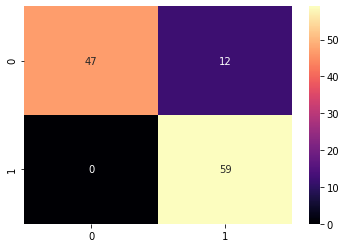

In [ ]:
sns.heatmap(cm, cmap="magma", annot= True)

In [ ]:
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_actual, y_test)

In [ ]:
from sklearn.metrics import auc
auc_keras = auc(fpr, tpr)

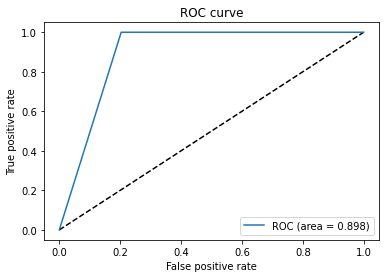

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='ROC (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()